Current waiting patient:wait time


Current treating patient:treat time 
Emily Davis:10, Joseph Williams:15, Ava Smith:20, Scarlett Harris:3, Sofia Lewis:2, Victoria Williams:3, Isabella Hernández:6, David Taylor:4, Ella White:8, Sebastian Nelson:23, Matthew Hill:3, Madison Brown:4, Olivia Williams:4, Joseph Moore:6, Victoria Smith:5, Sebastian Davis:2, Grace Davis:13, Avery Thompson:3, Ethan Thomas:13, Aiden Young:2, Sophia Anderson:4, Sofia Lopez:4, Madison Jones:4, Sebastian Scott:10, Michael Thomas:21, Evelyn Martínez:5, Lily Martin:2, Matthew Young:8, Sebastian Williams:2, 

Current waiting patient:wait time


Current treating patient:treat time 
Emily Davis:9, Joseph Williams:14, Ava Smith:19, Scarlett Harris:2, Sofia Lewis:1, Victoria Williams:2, Isabella Hernández:5, David Taylor:3, Ella White:7, Sebastian Nelson:22, Matthew Hill:2, Madison Brown:3, Olivia Williams:3, Joseph Moore:5, Victoria Smith:4, Sebastian Davis:1, Grace Davis:12, Avery Thompson:2, Ethan Thomas:12, Aiden Y

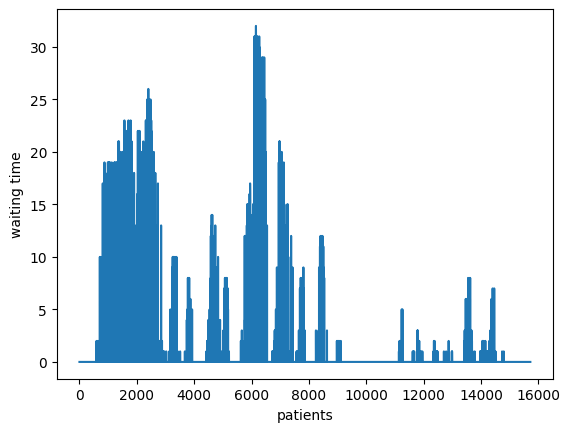

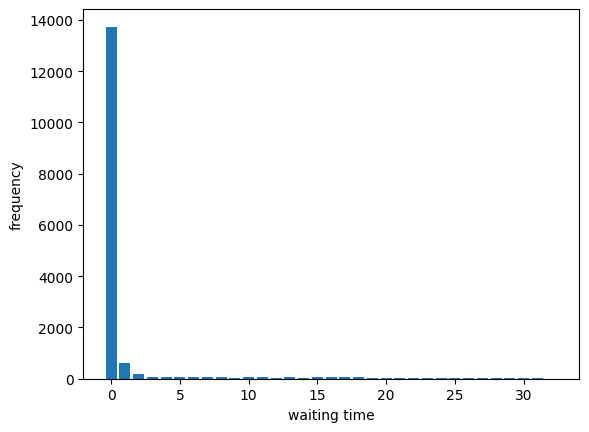

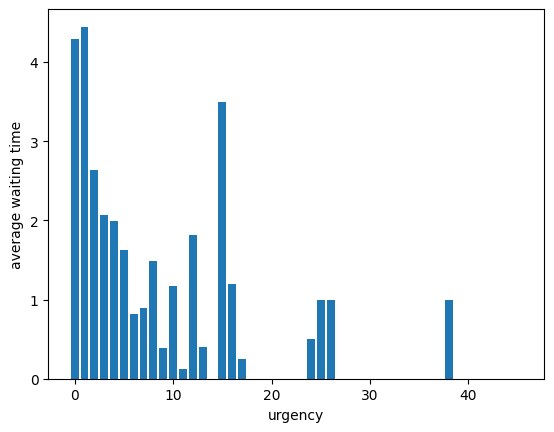

In [2]:
import random
import matplotlib.pyplot as plt
random.seed(10)
CAPACITY = 120

class hospital:
    def __init__(self, capacity):
        self.current_patient = []
        self.capacity = capacity
        self.past_patient = []

    def print_info(self):
        print("Current treating patient:treat time ")
        for i in self.current_patient:
            print(i.name+":"+str(i.treat_time), end=", ")
        print("\n")
        

    def pass_time(self):
        i=0
        while i < len(self.current_patient):
            self.current_patient[i].treat_time -= 1
            if self.current_patient[i].treat_time <= 0:
                self.past_patient.append(self.current_patient.pop(i))
            else:
                i+=1

    def add_patient(self, queue):
        while len(self.current_patient)<=self.capacity and queue.empty()==False:
            self.current_patient.append(queue.pop(0))

class Queue:
    def __init__(self):
        self.queue = []

    def put(self, item):
        self.queue.append(item)

    def pop(self, num):
        return self.queue.pop(num)

    def empty(self):
        return len(self.queue) == 0

    def pass_time(self):
        for patient in self.queue:
            patient.pass_time()
    
    def sort(self):
        self.queue.sort(key=lambda patient: (patient.emergency, patient.factor), reverse=True)

    # Traditional method, for comparison purpose
    # def sort(self):
    #     self.queue.sort(key=lambda patient: patient.emergency, reverse=True)

    def print_info(self):
        print("Current waiting patient:wait time")
        for i in self.queue:
            print(i.name+":"+str(i.wait_time)+":"+str(i.emergency), end=", ")
        print("\n")

FIRST_NAMES=["James", "Emma", "Olivia", "Liam", "Noah", "Isabella", "Sophia", "William", 
            "Elijah", "Benjamin", "Mia", "Lucas", "Alexander", "Henry", "Ava", "Sebastian", 
            "Ethan", "Michael", "Daniel", "Matthew", "Charlotte", "Harper", "David", 
            "Aiden", "Joseph", "Abigail", "Emily", "Samuel", "Jackson", "Scarlett", 
            "Madison", "Avery", "Evelyn", "Ella", "Grace", "Chloe", "Victoria", "Riley", 
            "Aria", "Lily", "Jack", "Leo", "Sofia", "Gabriel", "Aiden", "Madelyn", 
            "Amelia", "Mason"]

LAST_NAMES=["Smith", "Johnson", "Williams", "Brown", "Jones", "García", "Rodríguez", 
            "Martínez", "Davis", "Hernández", "Martínez", "Jackson", "Taylor", "Thomas", 
            "White", "Harris", "Martin", "Thompson", "Garcia", "Martinez", "Jones", 
            "Williams", "Brown", "Davis", "Miller", "Wilson", "Moore", "Taylor", 
            "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin", "Lee", 
            "Lewis", "Walker", "Hall", "Young", "King", "Wright", "Lopez", "Hill", 
            "Scott", "Green", "Adams", "Baker", "Nelson", "Carter"]

def generate_name():
    return random.choice(FIRST_NAMES) + " " + random.choice(LAST_NAMES)


# Placeholder function for ML model predicting urgency based on symptoms and other factors
def predict_urgency(patient_symptoms, patient_history):
    # For demo purpose, this will be random, since we did not cooperate with medical experts for now
    # In real implementation, this would be based on ML predictions
    return random.randint(1, 10)


class Patient:
    def __init__(self, name, emergency=False, symptoms="", history="", wait_time=0):
        self.name = name
        self.urgency = predict_urgency(symptoms, history)
        self.emergency = emergency
        self.symptoms = symptoms
        self.history = history
        self.wait_time = wait_time
        self.factor = 0
        self.determine_factor()
        self.treat_time = random.randint(1, 3)

    def __lt__(self, other):
        # Emergency cases are always prioritized
        if self.emergency != other.emergency:
            return self.emergency
        # Among non-emergency cases, prioritize by urgency
        return self.urgency < other.urgency
    
    def determine_factor(self):
        self.factor=5*self.urgency + 0.1*self.wait_time**2
    
    def __str__(self):
        return self.name
    
    def pass_time(self):
        self.wait_time += 1
        self.determine_factor()


def read_data():
    # Read data from csv file
    file=open("data.csv","r")
    data=file.readlines()
    file.close()
    return data

def process_data(data):
    # Process data into a dict of lists
    result={}
    data.pop(0)
    for i in range(len(data)):

        data[i]=data[i].split(",")
        date = data[i][2]
        date = date.split("/")
        for j in range(len(date)):
            date[j]=str(int(date[j]))
        date="/".join(date)
        patient_today=[data[i][7],int(data[i][9]),int(data[i][10])]
        if patient_today[0]=="E":
            patient_today[0]=True
        else:
            patient_today[0]=False

        if date in result:
            result[date].append(patient_today)
        else:
            result[date]=[patient_today]
    return result

def generate_patient_queue(patient_queue, processed_data, date):
    # Generate patient queue from data
    for i in processed_data[date]:
        patient=Patient(generate_name(), emergency=i[0])
        patient.urgency=i[2]
        patient.treat_time=i[1]
        patient_queue.put(patient)



# Draw the graph
def draw_graph(hospital):
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()
    waiting_time = []
    hist={}
    bar_chart={}
    for i in hospital.past_patient:
        waiting_time.append(i.wait_time)
    #caluculate the frequency of each waiting time
    for i in waiting_time:
        if i in hist:
            hist[i]+=1
        else:
            hist[i]=1
    freq=list(hist.values())
    time=list(hist.keys())
    #calculate the average waiting time for each urgency level, and exclude emergency patients
    for i in hospital.past_patient:
        if i.emergency!=True:
            if i.urgency in bar_chart:
                bar_chart[i.urgency][0]+=1
                bar_chart[i.urgency][1]+=i.wait_time
            else:
                bar_chart[i.urgency]=[1,i.wait_time]
    for i in bar_chart:
        bar_chart[i]=bar_chart[i][1]/bar_chart[i][0]
    avg_wait_time=list(bar_chart.values())
    urgency=list(bar_chart.keys())

    ax1.plot(waiting_time)
    ax2.bar(time,freq)
    ax3.bar(urgency,avg_wait_time)
    ax1.set_xlabel('patients')
    ax1.set_ylabel('waiting time')
    ax2.set_xlabel('waiting time')
    ax2.set_ylabel('frequency')
    ax3.set_xlabel('urgency')
    ax3.set_ylabel('average waiting time')
    print("total average waiting time:", sum(waiting_time)/len(waiting_time))
    plt.show()
    

def main():
    
    patient_queue = Queue() # Adding patients to the queue
    sample_hospital = hospital(CAPACITY) # we assume the capacity of the hospital
    run = ""
    data=read_data()
    processed_data=process_data(data)
    for i in processed_data:
        # Pass 1 unit time for patients in treatment
        sample_hospital.pass_time()
        # Pass 1 unit time for patients in queue
        patient_queue.pass_time()        
        # Adding new patients to the queue
        generate_patient_queue(patient_queue,processed_data,i)
        # Sort the queue
        patient_queue.sort()
        # Add patients for treatment
        sample_hospital.add_patient(patient_queue)
        
        patient_queue.print_info()
        sample_hospital.print_info()
        # run = input("Press enter to pass an hour, press q to quit, press s to show graph\n")
        # if run == "s":
        #     # Plotting the waiting time of patients in the hospital over time
        #     draw_graph(sample_hospital)
    
    
    draw_graph(sample_hospital)


if __name__ == "__main__":
    main()
